In [1]:
import sys
import os
import glob
import pickle
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<4):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    print("path_pipest not found. Instead: {}".format(path_pipest))
    raise ValueError("path_pipest not found.")
path_models=path_pipest+'/models'    
path_sdhawkes=path_pipest+'/sdhawkes'
path_modelling = path_sdhawkes+'/modelling'
path_resources = path_sdhawkes+'/resources'
path_impact=path_pipest+'/impact'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_tests = path_pipest+'/tests'
path_saved_tests = path_tests+'/saved_tests'
path_perfmeas=path_tests+'/performance_measurements'
sys.path.append(path_modelling)
sys.path.append(path_resources)
sys.path.append(path_perfmeas)
import numpy
import pandas
import matplotlib.pyplot as plt
import computation
import plot_tools

openmp.omp_get_max_threads(): 4


In [2]:
symbol="INTC"
date="2019-01-23"
time_window="45000-48600"

In [3]:
with open(path_impact+"/models/{}/{}_{}_{}/{}_sdhawkes_{}_{}"
          .format(symbol, symbol, date, time_window, symbol, date, time_window), 'rb') as source:
    model=pickle.load(source)

In [4]:
for idx in model.archive:
    try:
        print(model.archive[idx]['liquidator'].termination_time)
        print(idx)
    except:
        pass

182.4119933728191
INTC_sdhawkes_2019-01-23_45000-48600_bm3
209.11208936429693
INTC_sdhawkes_2019-01-23_45000-48600_bm5
102.45907037812827
INTC_sdhawkes_2019-01-23_45000-48600_bm2
757.6153961129598
INTC_sdhawkes_2019-01-23_45000-48600_bm1
129.3470801084369
INTC_sdhawkes_2019-01-23_45000-48600_bm4
381.46310919545977
INTC_sdhawkes_2019-01-23_45000-48600_bm0
894.1652159929577
INTC_sdhawkes_2019-01-23_45000-48600_bm6
299.5775787322875
INTC_sdhawkes_2019-01-23_45000-48600_bm9
2113.765402583611
INTC_sdhawkes_2019-01-23_45000-48600_bm7
92.6489131057881
INTC_sdhawkes_2019-01-23_45000-48600_bm8
567.9122275475327
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm0
937.1217939726469
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm1
83.75579575941299
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm2
158.61125076938907
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm3
268.4019667595395
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm5
136.3601066968733
INTC_sdhawkes_2019-01-23_45000-48600_sym_bm4


In [5]:
idx='{}_sdhawkes_{}_{}_bm0'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)

liquidator.initial_inventory: 10.0
liquidator.type_of_liquid: constant_intensity
liquidator.control_type: fraction_of_inventory
liquidator.control: 0.2
liquidator.base_rate: 0.15
liquidator.start_time: 0.0
liquidator.termination_time: 381.46310919545977


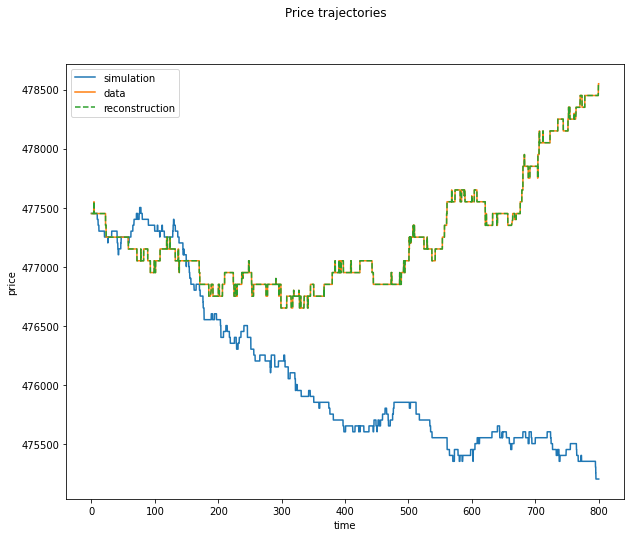

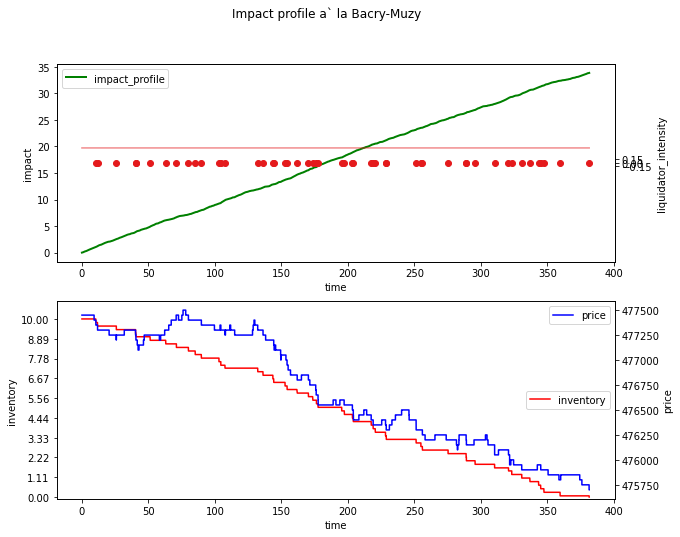

In [6]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=00.0, t1=800.0)
model.plot_bm_impact_profile()

In [7]:
idx='{}_sdhawkes_{}_{}_bm1'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)

liquidator.initial_inventory: 10.0
liquidator.type_of_liquid: constant_intensity
liquidator.control_type: fraction_of_bid_side
liquidator.control: 0.2
liquidator.base_rate: 0.15
liquidator.start_time: 0.0
liquidator.termination_time: 757.6153961129598


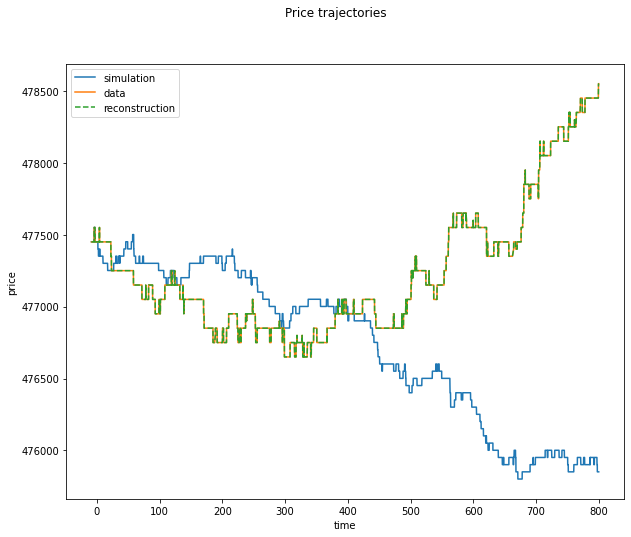

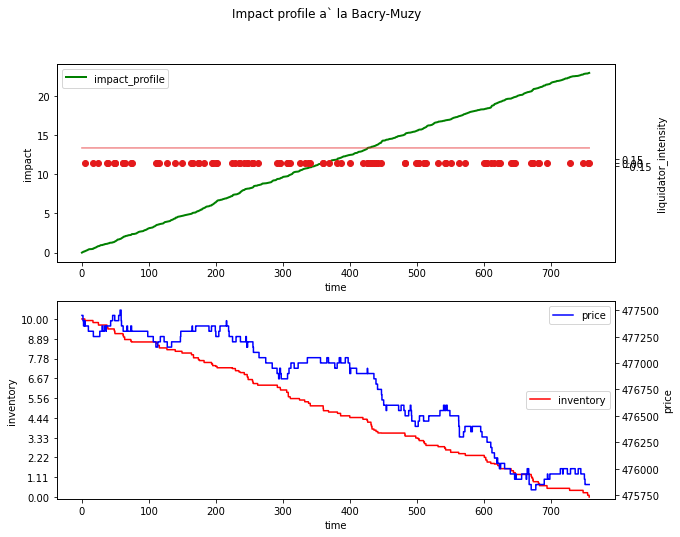

In [8]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=800.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm2'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm3'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+1.0,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.plot_price_trajectories(t0=-10.0, t1=500.0)

In [ ]:
model.plot_bm_impact_profile()

In [ ]:
idx='{}_sdhawkes_{}_{}_bm4'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=400.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm5'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)
model.liquidator.print_info()
model.plot_price_trajectories(t0=-50.0, t1=500.0)
model.plot_bm_impact_profile()


In [ ]:
idx='{}_sdhawkes_{}_{}_bm6'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=500.0)
model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=400.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm7'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

model.liquidator.print_info()

model.plot_price_trajectories(t0=-10.0, t1=2000.0)

model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=2000.0)

In [ ]:
idx='{}_sdhawkes_{}_{}_bm8'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1]+2,
                             ticksize=model.data.ticksize)

In [ ]:
model.liquidator.print_info()
model.plot_price_trajectories(t0=-10.0, t1=400.0)
model.plot_bm_impact_profile()
model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=1000.0)

liquidator.initial_inventory: 10.0
liquidator.type_of_liquid: constant_intensity
liquidator.control_type: fraction_of_inventory
liquidator.control: 0.2
liquidator.base_rate: 0.1
liquidator.start_time: 0.0
liquidator.termination_time: 567.9122275475327


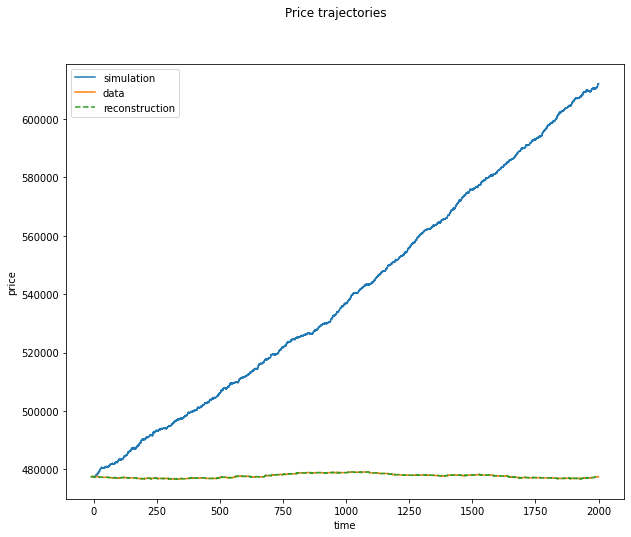

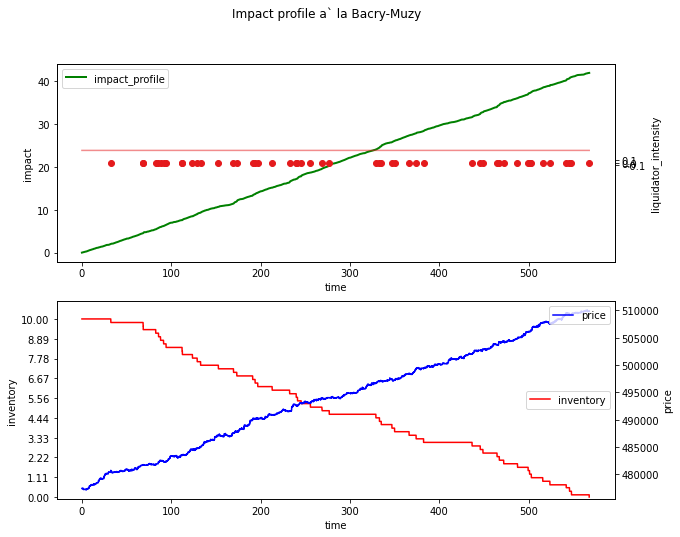

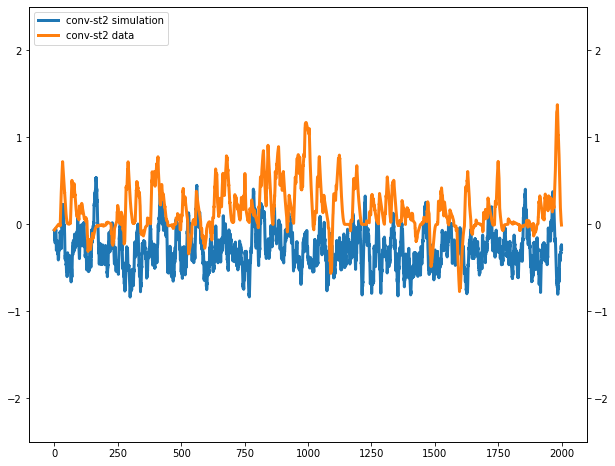

In [9]:
idx='{}_sdhawkes_{}_{}_sym_bm0'.format(symbol, date, time_window)
model.liquidator=model.archive[idx]['liquidator']
model.simulated_times=model.archive[idx]['simulated_times']
model.simulated_events=model.archive[idx]['simulated_events']
model.simulated_states=model.archive[idx]['simulated_states']
model.simulated_intensities=model.archive[idx]['simulated_intensities']
model.store_2Dstates()
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

model.liquidator.print_info()

model.plot_price_trajectories(t0=-10.0, t1=2000.0)

model.plot_bm_impact_profile()

model.data.observed_2Dstates=model.data.state_enc.produce_2Dstates(model.data.observed_states)
model.data.observed_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.data.observed_2Dstates[:,1], model.data.observed_times, dt=20.0
)
model.simulated_history_weighted_queueimb=computation.history_of_weighted_queueimb(
    model.simulated_2Dstates[:,1], model.simulated_times, dt=20.0
)
plot_tools.plot_queue_imbalance(model, t0=000.0, t1=2000.0)